# <span style="color:#F72585">Introducción a Keras Sequential y API Funcional</span>

## <span style="color:#4361EE">Introducción a TensorFlow</span>


La mejor introducción a esta biblioteca fundamental de inteligencia artificial es entrando a la [documentación oficial](https://www.tensorflow.org/)

## <span style="color:#4361EE">Introducción a Keras</span>

Keras no es más que una API funcionando sobre algún motor tensorial (Por ejemplo, **TensorFlow**).

Igual que antes, no hay nada mejor que ir a los sitios oficiales y chequear por sí mismxs la documentación oficial:

[![diosito2](https://keras.io/img/logo.png)](https://keras.io/)

## <span style="color:#4361EE">¿Por qué elegir Keras?</span>


Preguntémosle a dios Google:

[![dios_trends](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftechbullion.com%2Fwp-content%2Fuploads%2F2019%2F03%2FGoogle-Trends.jpg&f=1&nofb=1)](https://trends.google.com/trends/?geo=US)

## <span style="color:#4361EE">Importando Librerías Necesarias</span>


Como siempre, lo primero que debemos hacer es importar las librerías necesarias:

In [1]:
# Librería para manejo de tensores
import tensorflow as tf
# API para AI sobre motor de tensores
from tensorflow import keras
# Manejo de arreglos
import numpy as np
# Dibujitos
import matplotlib.pyplot as plt

## <span style="color:#4361EE">Simulando Datos </span>

En esta ocasión y por ser la introducción, mostraremos que el proceso de optimización visto en clase (usando JAX), es equivalente a construir una red neuronal artificial.

Para esto, simulemos unos datos de prueba:

In [2]:
# Genera datos espaciados uniformemente
x=np.linspace(-10,10,50)
# Modelo generado a partir de las entradas
y=2*x**2+3*x+5*np.random.normal(0,4,size=len(x))

Observemos algo de los datos simulados:

In [3]:
print(x)

[-10.          -9.59183673  -9.18367347  -8.7755102   -8.36734694
  -7.95918367  -7.55102041  -7.14285714  -6.73469388  -6.32653061
  -5.91836735  -5.51020408  -5.10204082  -4.69387755  -4.28571429
  -3.87755102  -3.46938776  -3.06122449  -2.65306122  -2.24489796
  -1.83673469  -1.42857143  -1.02040816  -0.6122449   -0.20408163
   0.20408163   0.6122449    1.02040816   1.42857143   1.83673469
   2.24489796   2.65306122   3.06122449   3.46938776   3.87755102
   4.28571429   4.69387755   5.10204082   5.51020408   5.91836735
   6.32653061   6.73469388   7.14285714   7.55102041   7.95918367
   8.36734694   8.7755102    9.18367347   9.59183673  10.        ]


In [4]:
print(y)

[144.14575171 164.0576503  116.72008413 112.87190094 137.7544845
 129.32507779  88.99667823 100.5707415   86.45318648  87.97188034
  47.72669807  83.03253274 -12.26008818   3.43842124  41.45007551
  -2.46042961  15.27263934  16.18728737  -2.59878231  -1.2125443
  -7.69240645 -14.39037657   2.49473243  -4.77195947 -12.50479598
  -5.29334396  -5.33773835  29.54194558  -3.5574617   25.132258
  49.98741351  32.74592932  34.13826917  52.79874452  47.93517101
  68.59385258  86.20517719  48.68379053 110.35630663  91.0168789
  93.3488761  114.87132414  94.72951442 120.6100751  160.41623145
 148.16759552 161.38367117 214.66750768 231.93651426 210.54988118]


## <span style="color:#4361EE">Visualizando Datos</span>

En lo posible, trate de visualizar datos para tener una intuición sobre lo que está pasando. Es claro que no siempre es posible hacerlo, pero existen, por ejemplo, técnicas de reducción de dimensión para dar una idea vaga de lo que está pasando.

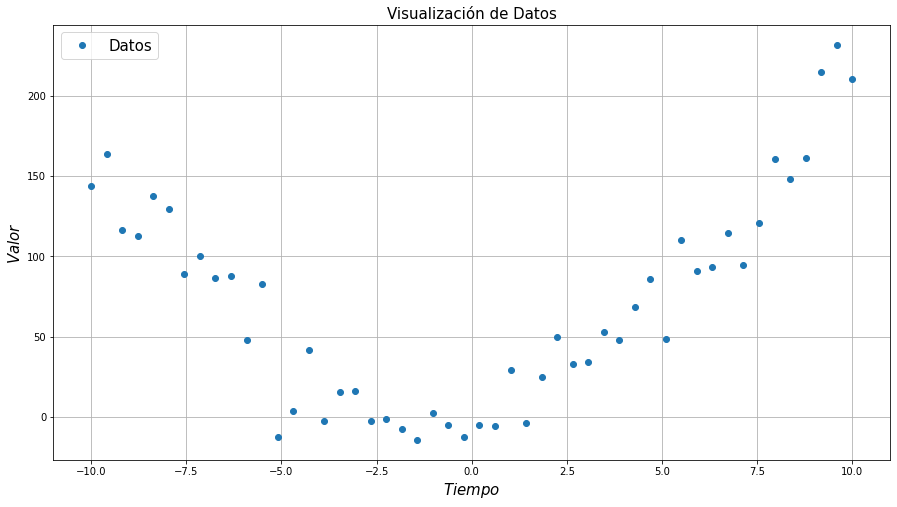

In [5]:
# Generar Lienzo
plt.figure(figsize=(15,8))
#Titulo del lienzo
plt.title("Visualización de Datos",fontsize=15)
#Dibujar datos
plt.plot(x,y,'o')
# Leyenda de los datos
plt.legend(["Datos"],fontsize=15)
# Nombrar Ejes
plt.xlabel("$Tiempo$",fontsize=15)
plt.ylabel("$Valor$",fontsize=15)

# Poner cuadrícula
plt.grid()
# Mostrar imagen
plt.show()

## <span style="color:#4361EE">Construyendo Red Neuronal (Diseño)</span>


Para construir nuestra primera red Neuronal, recuerde el siguiente dibujo:

![Perceptron](https://i.ytimg.com/vi/kft1AJ9WVDk/maxresdefault.jpg)

Vemos que el dibujo opera de izquierda a derecha ($\rightarrow$), por lo que tiene sentido llamarlo **Modelo Secuencial**.

En este caso, usaremos una neurona (`units`) y la dimensión de entrada es unidimensional (`input_shape`)

In [6]:
model = keras.Sequential(
    keras.layers.Dense(units=1,input_shape=(1,))
    )

## <span style="color:#4361EE">Compilando Red Neuronal (Forma de Optimizar)</span>


Ahora que tenemos nuestra maqueta de las ecuaciones del modelo, elegimos una función de pérdida adecuada a nuestro problema y un optimizador para minimizar dicha pérdida:

In [7]:
model.compile(optimizer='sgd', loss='mean_squared_error')

## <span style="color:#4361EE">Resumen de la Red Neuronal</span>


El modelo creado y compilado tiene muchos otros métodos interesantes.

Por ejemplo, podemos ver el resumen de lo que tiene la red.

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


También es posible visualizar los modelos en forma de grafo, lo cual es muy útil para tener control global de la arquitectura del modelo:

In [9]:
from tensorflow.keras.utils import plot_model

In [10]:
plot_model(model,show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


## <span style="color:#4361EE">Entrenando Red Neuronal (Fancy para "Ajustar los datos")</span>


In [11]:
model.fit(x, y, epochs=10,verbose=1)

Epoch 1/10
2/2 [==============================] - 0s 3ms/step - loss: 9445.3291
Epoch 2/10
2/2 [==============================] - 0s 6ms/step - loss: 9851.3457
Epoch 3/10
2/2 [==============================] - 0s 4ms/step - loss: 8934.1611
Epoch 4/10
2/2 [==============================] - 0s 3ms/step - loss: 8374.4512
Epoch 5/10
2/2 [==============================] - 0s 3ms/step - loss: 7616.5977
Epoch 6/10
2/2 [==============================] - 0s 3ms/step - loss: 7511.6475
Epoch 7/10
2/2 [==============================] - 0s 5ms/step - loss: 7089.0918
Epoch 8/10
2/2 [==============================] - 0s 2ms/step - loss: 6778.0537
Epoch 9/10
2/2 [==============================] - 0s 5ms/step - loss: 6722.5249
Epoch 10/10
2/2 [==============================] - 0s 3ms/step - loss: 6671.2485


## <span style="color:#4361EE">Visualizar Resultados de la Red </span>


In [12]:
#Obtener Pesos de la Red
w=model.get_weights();
print(w)
#Imprimir resultados
print("\nObjeto Pesos:",w)
print('\nNumber of Weights -> '+ str(len(w)))
print('\nw = ' + str(w[0][0]) +'(Weight)')
print('b = ' + str(w[1])+'("Weight"->Bias)')

[array([[-0.15806723]], dtype=float32), array([23.963522], dtype=float32)]

Objeto Pesos: [array([[-0.15806723]], dtype=float32), array([23.963522], dtype=float32)]

Number of Weights -> 2

w = [-0.15806723](Weight)
b = [23.963522]("Weight"->Bias)


## <span style="color:#4361EE">Predecir valores dentro de los datos (Ver Regresión)</span>


In [13]:
predecir=model.predict(x)
#print(predecir)
#np.vstack((predecir.reshape(-1,),y)).T

## <span style="color:#4361EE">Visualizar Resultados</span>

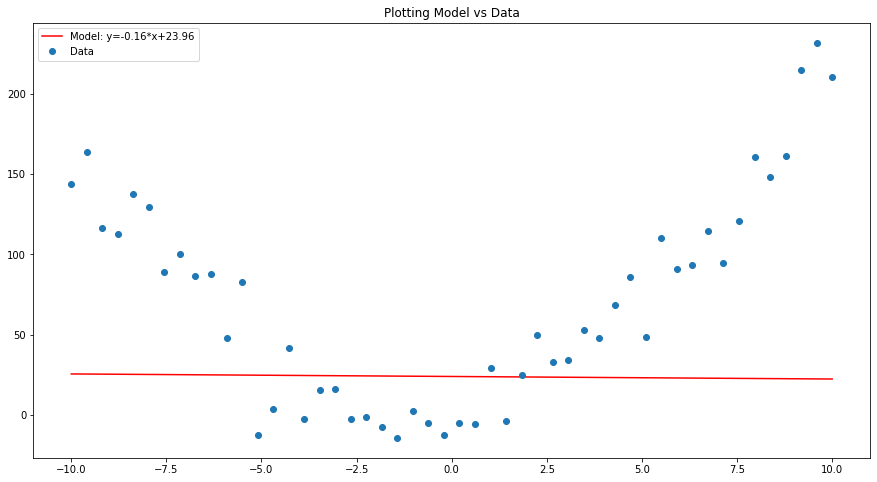

In [14]:
plt.figure(figsize=(15,8))
plt.plot(x,predecir,'r-',label='Model: y={:.2f}*x+{:.2f}'.format(w[0].item(),w[1].item()))
plt.plot(x,y,'o', label='Data')
plt.title('Plotting Model vs Data')
plt.legend(loc=0)
plt.show()

## <span style="color:#4361EE">Mejorando Red Neuronal</span>

In [15]:
model2 = tf.keras.Sequential([
    keras.layers.Dense(units=5,input_shape=(1,),activation='softplus'),
    keras.layers.Dense(units=10,activation='softplus'),
    keras.layers.Dense(units=20,activation='softplus'),
    keras.layers.Dense(units=1),
    ])
model2.compile(optimizer='adam', loss='mean_squared_error')
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 5)                 10        
                                                                 
 dense_2 (Dense)             (None, 10)                60        
                                                                 
 dense_3 (Dense)             (None, 20)                220       
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 311
Trainable params: 311
Non-trainable params: 0
_________________________________________________________________


In [16]:
history=model2.fit(x, y, epochs=1000,verbose=0)

In [17]:
#Obtener Pesos de la Red
w2=model2.get_weights();
#Imprimir resultados
#print("\nObjeto Pesos:",w2)
#print('\nNumber of Weights -> '+ str(len(w2)))
#print('\nw = ' + str(w[0][0]) +'(Weight)')
#print('b = ' + str(w[1])+'("Weight"->Bias)')

In [18]:
x_test=np.linspace(x[0],x[-1],300)
predecir=model2.predict(x_test)

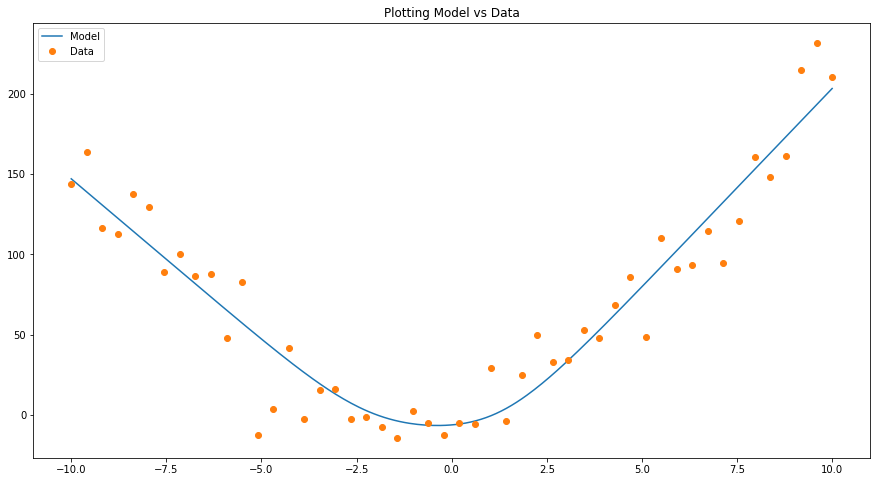

In [19]:
plt.figure(figsize=(15,8))
plt.plot(x_test,predecir,label='Model')
plt.plot(x,y,'o', label='Data')
plt.title('Plotting Model vs Data')
plt.legend(loc=0)
plt.show()

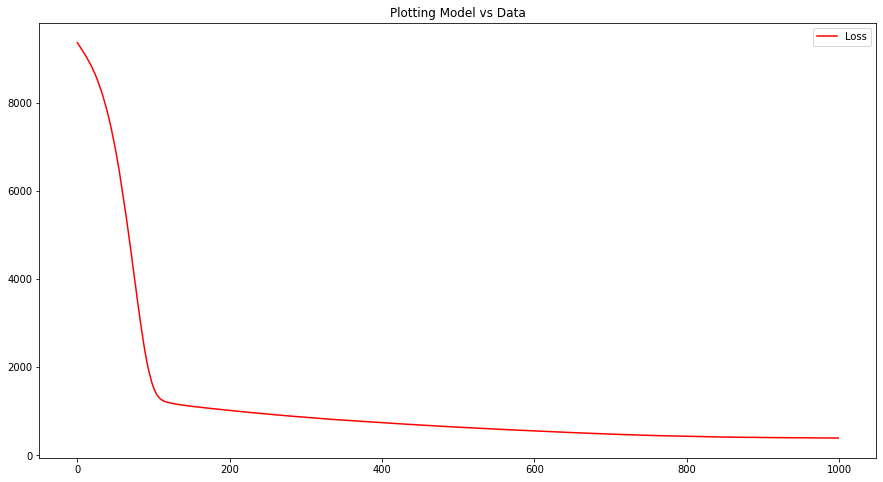

In [20]:
plt.figure(figsize=(15,8))
plt.plot(history.history['loss'],'r-',label='Loss')
plt.title('Plotting Model vs Data')
plt.legend(loc=0)
plt.show()

## <span style="color:#4361EE">Datos más retadores</span>


In [21]:
trend=0.1
time=np.arange(0,100,0.1)
y=trend*time+np.sin(time)+np.random.normal(scale=0.5,size=len(time))

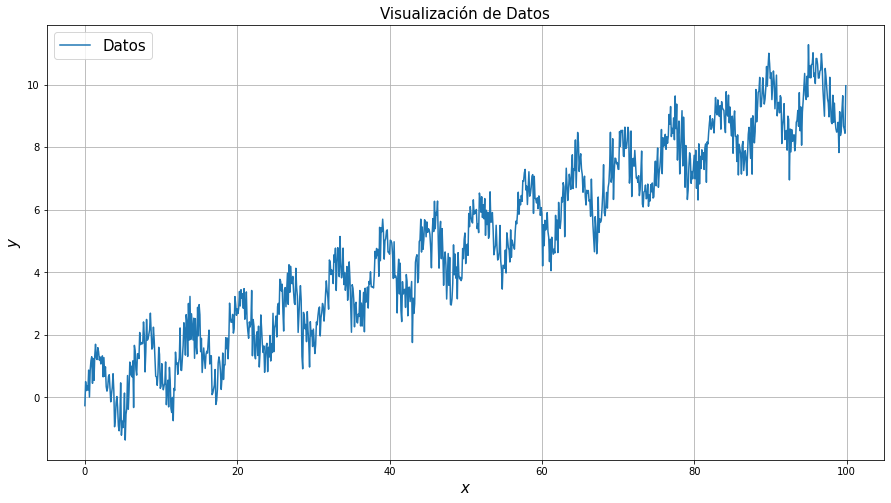

In [22]:
plt.figure(figsize=(15,8))
plt.title("Visualización de Datos",fontsize=15)
plt.plot(time,y,'-')
plt.legend(["Datos"],fontsize=15)
plt.xlabel("$x$",fontsize=15)
plt.ylabel("$y$",fontsize=15)
plt.grid()
plt.show()

In [23]:
model3 = tf.keras.Sequential([
    keras.layers.Dense(units=10,input_shape=(1,),activation='elu'),
    keras.layers.Dense(units=20,activation='elu'),
    keras.layers.Dense(units=30,activation='elu'),
    keras.layers.Dense(units=40,activation='elu'),
    keras.layers.Dense(units=50,activation='elu'),
    keras.layers.Dense(units=60,activation='elu'),
    keras.layers.Dense(units=70,activation='elu'),
    keras.layers.Dense(units=1)
    ])

model3.compile(optimizer='adam', loss='mean_squared_error')
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 20)                220       
                                                                 
 dense_7 (Dense)             (None, 30)                630       
                                                                 
 dense_8 (Dense)             (None, 40)                1240      
                                                                 
 dense_9 (Dense)             (None, 50)                2050      
                                                                 
 dense_10 (Dense)            (None, 60)                3060      
                                                                 
 dense_11 (Dense)            (None, 70)               

In [24]:
history=model3.fit(time, y, epochs=10000,verbose=0)

In [ ]:
#Obtener Pesos de la Red
w3=model3.get_weights();
#Imprimir resultados
#print("\nObjeto Pesos:",w2)
#print('\nNumber of Weights -> '+ str(len(w2)))
#print('\nw = ' + str(w[0][0]) +'(Weight)')
#print('b = ' + str(w[1])+'("Weight"->Bias)')

In [ ]:
x_test=np.linspace(time[0],time[-1],3000)
predecir=model3.predict(x_test)

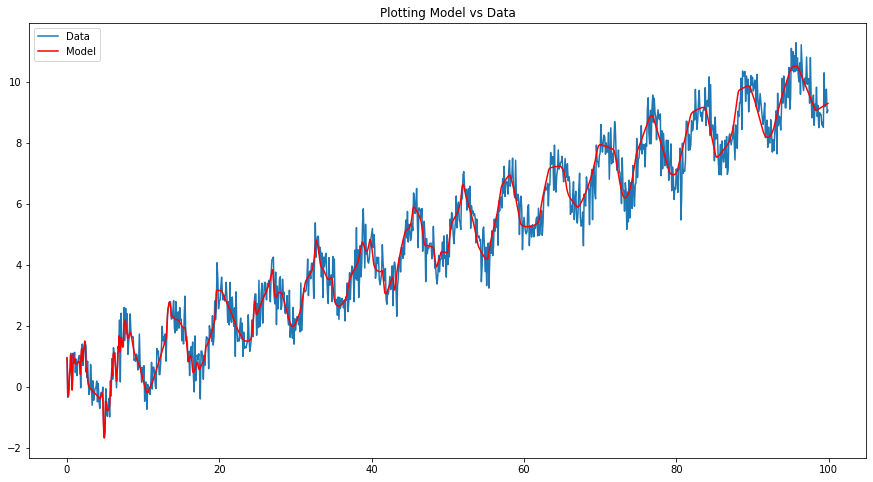

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(time,y,'-', label='Data')
plt.plot(x_test,predecir,'r',label='Model')
plt.title('Plotting Model vs Data')
plt.legend(loc=0)
plt.show()

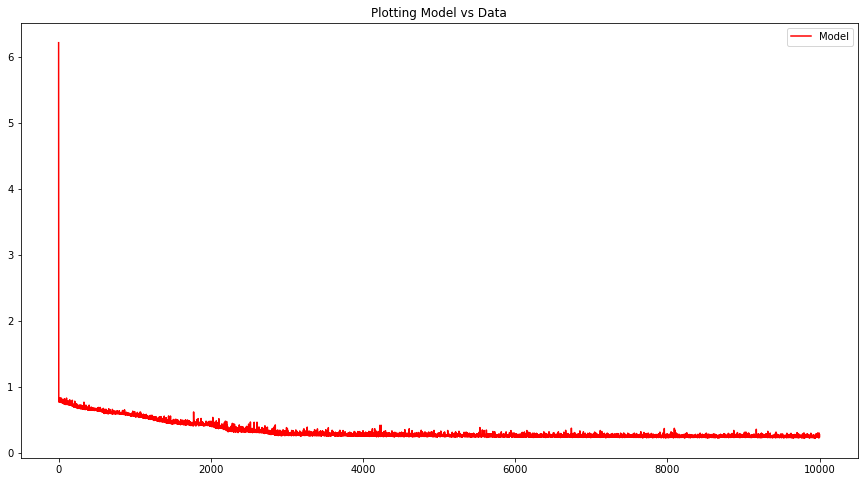

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(history.history['loss'],'r-',label='Model')
plt.title('Plotting Model vs Data')
plt.legend(loc=0)
plt.show()

## <span style="color:#4361EE">API Funcional</span>


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Activation, Input,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
trend=0.1
time=np.arange(0,100,0.1)
y=trend*time+np.sin(time)+np.random.normal(scale=0.5,size=len(time))

In [ ]:
inputs=Input(shape=(1,))
output=inputs
capas=10
dim=10
output=Activation('elu')(output)

for capa in range(capas):
    output=Dense(dim)(output)
    output=Activation('elu')(output)
    dim+=10
output=Dense(1)(output)

model=Model(inputs,output)
model.compile(loss='mse',optimizer='adam')
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                20        
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 20)                220       
_________________________________________________________________
activation_2 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 30)               

In [ ]:
history=model.fit(time,y,epochs=500,verbose=0)

In [ ]:
x_test=np.linspace(time[0],time[-1],1000)
predecir=model.predict(x_test)

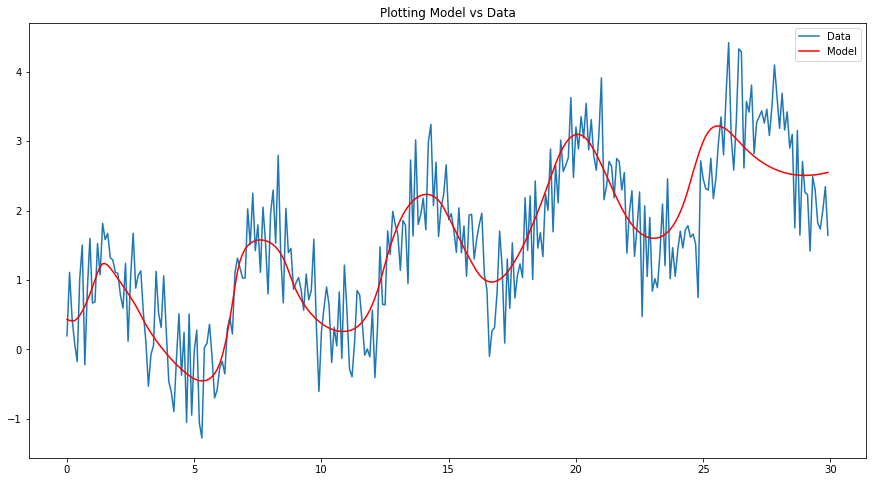

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(time[0:300],y[0:300],'-', label='Data')
plt.plot(x_test[0:300],predecir[0:300],'r',label='Model')
plt.title('Plotting Model vs Data')
plt.legend(loc=0)
plt.show()

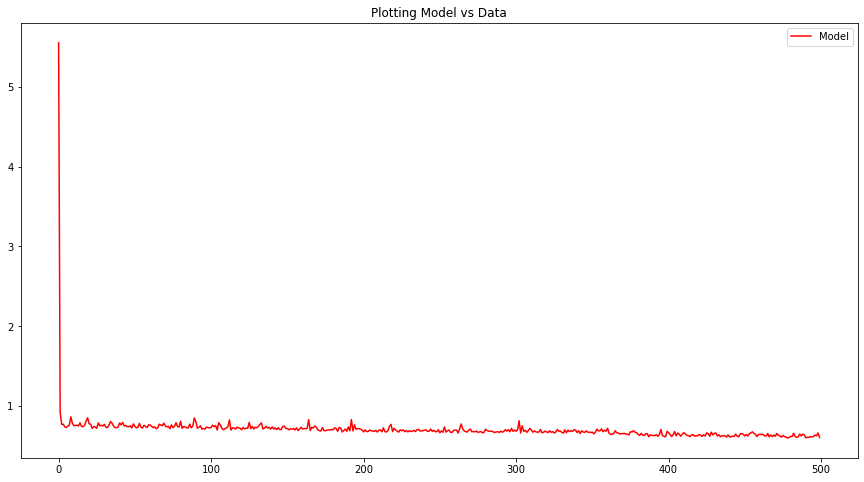

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(history.history['loss'],'r-',label='Model')
plt.title('Plotting Model vs Data')
plt.legend(loc=0)
plt.show()